<a href="https://colab.research.google.com/github/Maria-UET/Hands-on-Machine-Learning-with-Scikit-Learn-Keras-and-TensorFlow/blob/master/3D_Computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

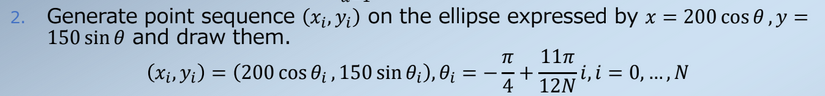

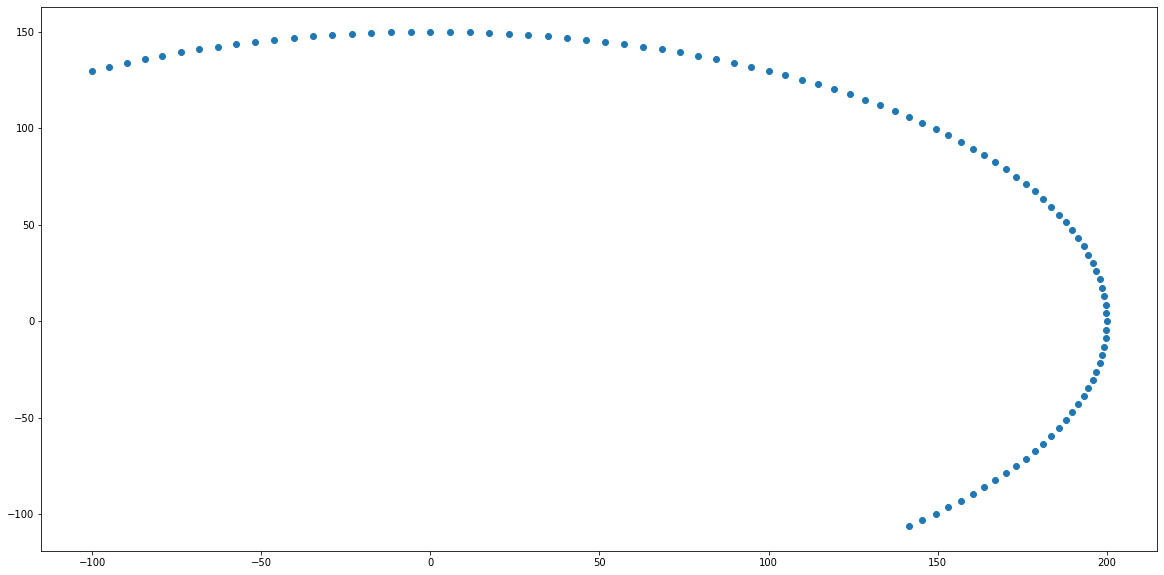

In [42]:
import numpy as np
import math
import matplotlib.pyplot as plt
import numpy.linalg as la


eata = 0 # to avoid dividing by 0
N =100
seq = np.linspace(0,N,N)
x = [200*math.cos(-math.pi*(1/4)+math.pi*((11*v)/(12*N))) for v in seq ]
y = [150*math.sin(-math.pi*(1/4)+math.pi*((11*v)/(12*N))) for v in seq ]

plt.figure(figsize=(20,10))
plt.scatter(x,y)


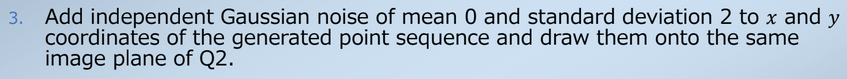

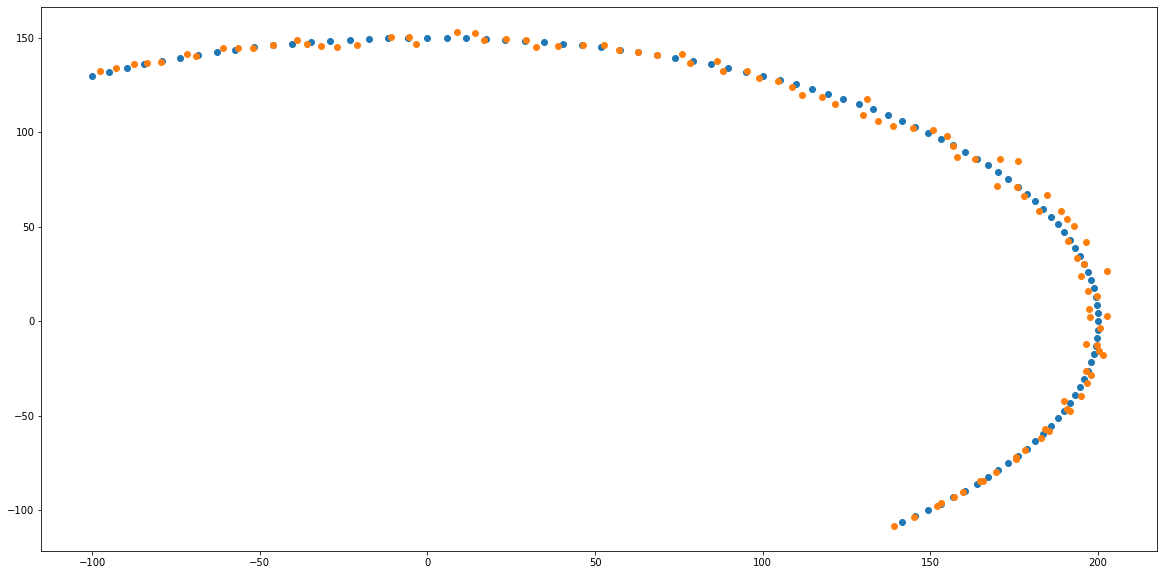

In [43]:
mu = 0
sigma = 2
noise = np.random.normal(mu, sigma, size=seq.shape)

x_noisy = x+noise
y_noisy = y+noise
plt.figure(figsize=(20,10))
plt.scatter(x,y)
plt.scatter(x_noisy,y_noisy)

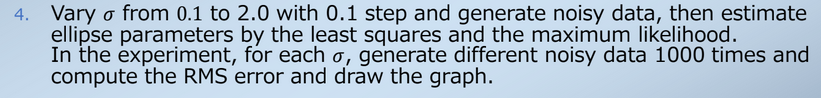

# Generating data

x and y have N * 1000 * 20 data points each

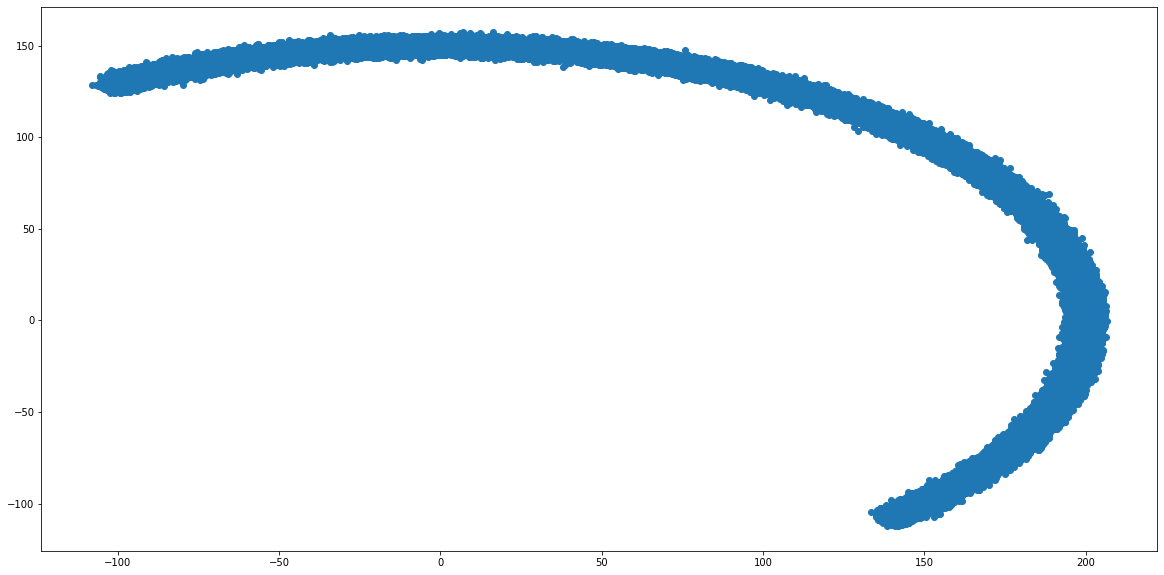

In [44]:
sigma_seq = np.linspace(0.1,2.0,20)

x_data = np.empty((N,0))
y_data = np.empty((N,0))

for i in range(1000):
  x_noisy = np.array( [x+np.random.normal(mu, sigma, size=seq.shape) for sigma in sigma_seq] )
  x_noisy = np.ndarray.flatten(x_noisy)
  x_data = np.append(x_data,x_noisy)
  y_noisy = np.array( [y+np.random.normal(mu, sigma, size=seq.shape) for sigma in sigma_seq] )
  y_noisy = np.ndarray.flatten(y_noisy)
  y_data = np.append(y_data,y_noisy)

plt.figure(figsize=(20,10))
plt.scatter(x_data,y_data)

In [46]:
  def as_parameters(self):
        """Returns the definition of the fitted ellipse as localized parameters
        Returns
        _______
        center : list
            [x0, y0]
        width : float
            Semimajor axis
        height : float
            Semiminor axis
        phi : float
            The counterclockwise angle of rotation from the x-axis to the major
            axis of the ellipse
        """

        # Eigenvectors are the coefficients of an ellipse in general form
        # a*x^2 + 2*b*x*y + c*y^2 + 2*d*x + 2*f*y + g = 0
        a = coefficients[0]
        b = coefficients[1] / 2.
        c = coefficients[2]
        d = coefficients[3] / 2.
        f = coefficients[4] / 2.
        g = coefficients[5]

        # Finding center of ellipse
        x0 = (c*d - b*f) / (b**2. - a*c)
        y0 = (a*f - b*d) / (b**2. - a*c)
        center = [x0, y0]

        # Find the semi-axes lengths 
        numerator = 2 * (a*f**2 + c*d**2 + g*b**2 - 2*b*d*f - a*c*g)
        denominator1 = (b * b - a * c) * (
            (c - a) * np.sqrt(1 + 4*b*b / ((a - c)*(a - c))) - (c + a)
        )
        denominator2 = (b*b - a*c) * (
            (a - c) * np.sqrt(1 + 4*b*b / ((a - c) * (a - c))) - (c + a)
        )
        width = np.sqrt(numerator / denominator1)
        height = np.sqrt(numerator / denominator2)

        # Angle of counterclockwise rotation of major-axis of ellipse to x-axis
        phi = .5 * np.arctan((2.*b) / (a - c))

        return center, width, height, phi
    # source: https://github.com/bdhammel/least-squares-ellipse-fitting/


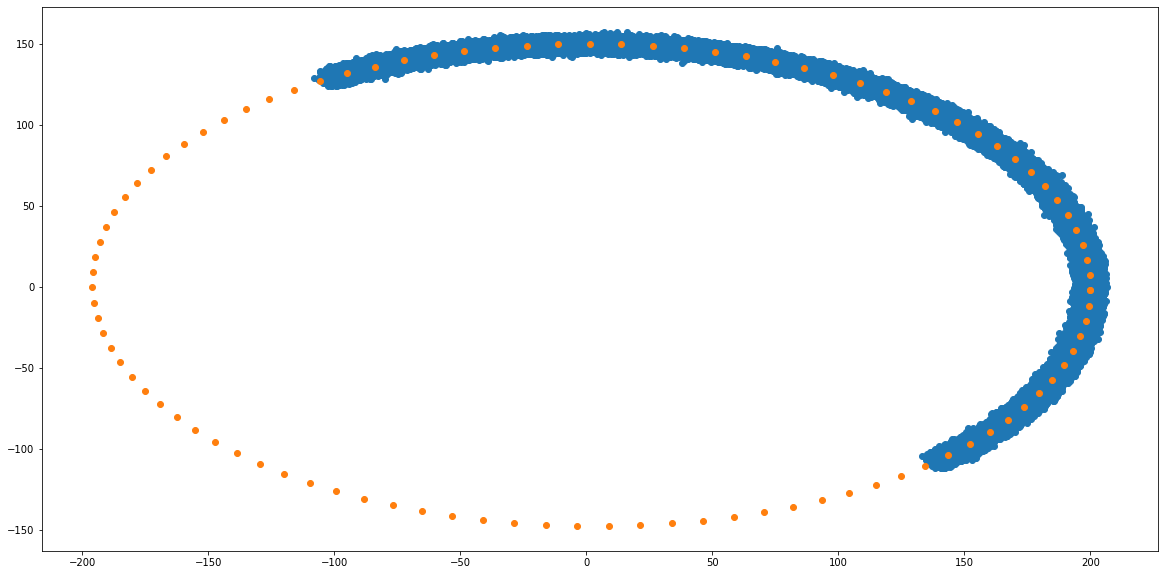

In [47]:
D1 = np.vstack([x_data**2, x_data*y_data, y_data**2]).T
D2 = np.vstack([x_data, y_data, np.ones_like(x_data)]).T
S1 = D1.T @ D1
S2 = D1.T @ D2
S3 = D2.T @ D2
C1 = np.array([[0., 0., 2.], [0., -1., 0.], [2., 0., 0.]])
M = la.inv(C1) @ (S1 - S2 @ la.inv(S3) @ S2.T)
eigval, eigvec = np.linalg.eig(M)
cond = (4*np.multiply(eigvec[0, :], eigvec[2, :])
            - np.power(eigvec[1, :], 2))
a1 = eigvec[:, np.nonzero(cond > 0)[0]]
a2 = la.inv(-S3) @ S2.T @ a1
coefficients = np.asarray(np.vstack([a1, a2])).ravel()

center, width, height, phi = as_parameters(coefficients)

t = np.linspace(0, 2 * np.pi, N)

x_pred = (center[0]
             + width * np.cos(t) * np.cos(phi)
             - height * np.sin(t) * np.sin(phi))
y_pred = (center[1]
             + width * np.cos(t) * np.sin(phi)
             + height * np.sin(t) * np.cos(phi))

plt.figure(figsize=(20,10))
plt.scatter(x_data,y_data)
plt.scatter(x_pred,y_pred)

In [55]:
import shlex, subprocess
!apt update
!apt install texlive-xetex texlive-fonts-recommended texlive-generic-recommended

import re, pathlib, shutil

# Get a list of all your Notebooks
notebooks = [x for x in pathlib.Path("/content/drive/My Drive/Colab Notebooks").iterdir() if 
             re.search(r"\.ipynb", x.name, flags = re.I)]

for i, n in enumerate(notebooks):
    print(f"\nProcessing  [{i+1:{len(str(len(notebooks)))}d}/{len(notebooks)}]  {n.name}\n")

    # Optionally copy your notebooks from gdrive to your vm
    shutil.copy(n, n.name)
    n = pathlib.Path(n.name)

    !jupyter nbconvert "{n.as_posix()}" --to pdf --output "{n.stem.replace(" ", "_")}"

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:14 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists... Done
Building dependency tree       